# Classification des Iris avec du Machine Learning

## Algorithme Arbre de décision (Decision Tree)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import tree

# Importation de la librairie de préparation des données (Test, Entrainement)
from sklearn.model_selection import train_test_split

In [2]:
# Lecture du jeu de donnée Iris
data = load_iris()
# Extraction des attributs/Features 
X = data.data
# Extraction des Cible
y = data.target

In [3]:
print('The full description of the dataset:\n',data['DESCR'])

The full description of the dataset:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============

## Création des jeux de données

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

## Création du modèle Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prédiction et calcul de la précision

In [14]:
y_pred = clf.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9473684210526315


## Visualisation du résultat

In [7]:
!pip install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

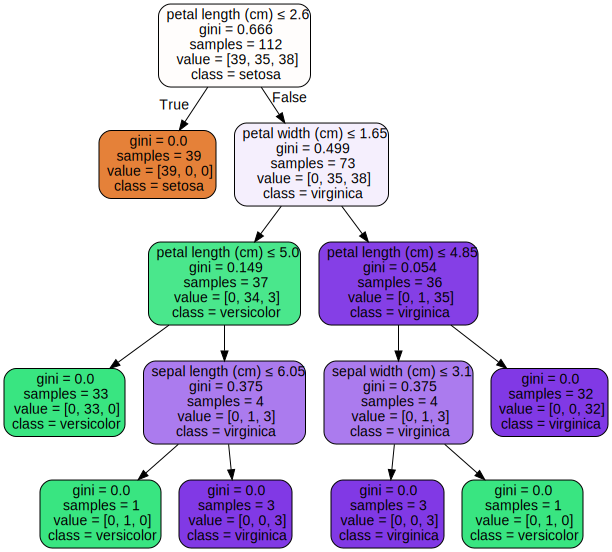

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Test d'une Iris
### Quel type d'iris a un sépale de 3 cm x 5 cm et un pétale de 4 cm x 2 cm ?

In [10]:
print(data.target_names[clf.predict([[4.30,1.10,3.00,0.10]])])

['versicolor']
